In [3]:
# Loading libraries
import pickle
import numpy as np

# Load pickle

def load_train_images():
    X_train_left = pickle.load(open('X_train_left.pkl', 'rb'))
    Y_train_left = pickle.load(open('Y_train_left.pkl', 'rb'))
    X_train_realsense = pickle.load(open('X_train_realsense.pkl', 'rb'))
    Y_train_realsense = pickle.load(open('Y_train_realsense.pkl', 'rb'))
    X_train_right = pickle.load(open('X_train_right.pkl', 'rb'))
    Y_train_right = pickle.load(open('Y_train_right.pkl', 'rb'))
    return X_train_left, Y_train_left, X_train_realsense, Y_train_realsense, X_train_right, Y_train_right

X_train_left, Y_train_left, X_train_realsense, Y_train_realsense, X_train_right, Y_train_right = load_train_images()

def load_test_images():
    X_test_left = pickle.load(open('X_test_left.pkl', 'rb'))
    Y_test_left = pickle.load(open('Y_test_left.pkl', 'rb'))
    X_test_realsense = pickle.load(open('X_test_realsense.pkl', 'rb'))
    Y_test_realsense = pickle.load(open('Y_test_realsense.pkl', 'rb'))
    X_test_right = pickle.load(open('X_test_right.pkl', 'rb'))
    Y_test_right = pickle.load(open('Y_test_right.pkl', 'rb'))
    return X_test_left, Y_test_left, X_test_realsense, Y_test_realsense, X_test_right, Y_test_right

X_test_left, Y_test_left, X_test_realsense, Y_test_realsense, X_test_right, Y_test_right = load_test_images()

# Ensemble model

import tensorflow as tf

model_left = tf.keras.models.load_model('CNN_left_2')
model_realsense = tf.keras.models.load_model('CNN_realsense_2')
model_right = tf.keras.models.load_model('CNN_right_2')

pred1 = model_left.predict(X_test_left)
pred2 = model_realsense.predict(X_test_realsense)
pred3 = model_right.predict(X_test_right)

finalpred = (pred1+pred2+pred3)/3

y_pred = np.argmax(finalpred, axis=-1)
y_true = np.argmax(Y_test_right, axis=-1)
print(finalpred)

print(Y_test_right.shape)


99/99 [==============================] - 0s 2ms/step
[[9.9948031e-01 1.0594484e-09 7.7482439e-12 ... 3.3867378e-13
  1.8447726e-16 8.8622850e-12]
 [9.9899143e-01 4.4131401e-09 2.3740739e-11 ... 1.1135695e-12
  3.1475043e-16 2.2957664e-11]
 [9.9860650e-01 7.3365327e-09 2.9038223e-11 ... 2.0537541e-12
  4.3185400e-16 3.1083056e-11]
 ...
 [1.2962193e-12 5.7580741e-13 3.5094159e-18 ... 2.5719887e-10
  9.5639807e-05 9.9950749e-01]
 [2.8216103e-12 5.6880130e-13 5.1789348e-18 ... 3.2469635e-10
  6.7878012e-05 9.9943858e-01]
 [8.8427399e-13 7.7113787e-13 5.2928210e-18 ... 8.6240898e-10
  1.2825221e-04 9.9943632e-01]]
(3150, 210)


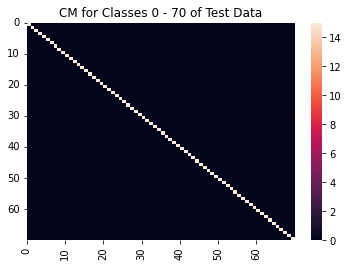

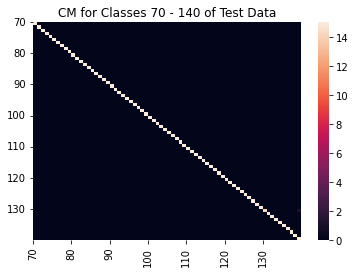

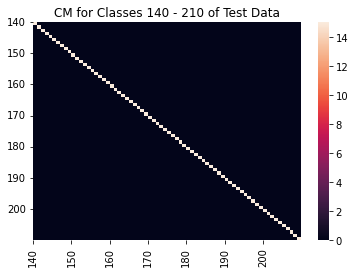

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00        15
          17       1.00    

In [8]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sbn

ypred = np.argmax(finalpred, axis=-1)
ytrue = np.argmax(Y_test_right, axis=-1) 

CM1_1 = confusion_matrix(ytrue, ypred, labels=np.arange(0,70))
ax = plt.axes()
sbn.heatmap(CM1_1, annot=False,
            annot_kws = {"size":10},
            xticklabels = np.arange(0,70,10),
            yticklabels = np.arange(0,70,10), ax = ax),
ax.set_title("CM for Classes 0 - 70 of Test Data")
plt.xticks(ticks=np.arange(0,70,10), labels=np.arange(0,70,10))
plt.yticks(ticks=np.arange(0,70,10), labels=np.arange(0,70,10))
plt.show()

CM1_2 = confusion_matrix(ytrue, ypred, labels=np.arange(70,140))
ax = plt.axes()
sbn.heatmap(CM1_2, annot=False,
            annot_kws = {"size":10},
            xticklabels = np.arange(70,140,10),
            yticklabels = np.arange(70,140,10), ax=ax),
ax.set_title("CM for Classes 70 - 140 of Test Data")
plt.xticks(ticks=np.arange(0,70,10), labels=np.arange(70,140,10))
plt.yticks(ticks=np.arange(0,70,10), labels=np.arange(70,140,10))
plt.show()

CM1_3 = confusion_matrix(ytrue, ypred, labels = np.arange(140, 210))
ax = plt.axes()
sbn.heatmap(CM1_3, annot=False,
            annot_kws = {"size":10},
            xticklabels = np.arange(140,210,10),
            yticklabels = np.arange(140,210,10), ax = ax),
ax.set_title("CM for Classes 140 - 210 of Test Data")
plt.xticks(ticks=np.arange(0,70,10), labels=np.arange(140,210,10))
plt.yticks(ticks=np.arange(0,70,10), labels=np.arange(140,210,10))
plt.show()

# Classification Report

from sklearn.metrics import classification_report

report_ensemble_model = classification_report(y_true, y_pred)
print(report_ensemble_model)

# # ROC-curve

# path = '/Volumes/Macintosh HD/Users/keeswagemans/Desktop/Thesis/iCub dataset/'
# objects = open(path + 'objects.txt')
# objects = list(objects)
# objects = [i.split('\n', 1)[0] for i in objects]
# objects = [i.replace(' ', '_') for i in objects]

# from sklearn.preprocessing import LabelBinarizer
# from sklearn.metrics import roc_curve, auc, roc_auc_score

# fig, c_ax = plt.subplots(1, 1, figsize = (12,8))

# def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
#     lb = LabelBinarizer()
#     lb.fit(y_test)
#     y_test = lb.transform(y_test)
#     y_pred = lb.transform(y_pred)

#     for (idx, c_label) in enumerate(objects):
#         fpr, tpr, thresholds = roc_curve(y_test[:, idx].astype(int), y_pred[:, idx])
#         c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
#     c_ax.plot(fpr, fpr, 'b-', label='Random Guessing')
#     return roc_auc_score(y_test, y_pred, average=average)


# print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_pred))

# c_ax.legend()
# c_ax.set_xlabel('False Positive Rate')
# c_ax.set_ylabel('True Positive Rate')
# plt.show()